<div style="border:solid green 2px; padding: 20px"> 
Oi Gabriel, tudo bem? 
    
Me chamo Lourenço, vou ser o corretor em português do seu projeto! Prazer em conhecê-lo! 🙌 
 
Meus comentários irão seguir o seguinte padrão:

<div class="alert alert-success">
    <b>Correto:</b> Cumpriu corretamente tudo que foi pedido
</div>
<div class="alert alert-warning">
    <b>Recomendação:</b> Existe espaço para melhoramento do código
</div>
<div class="alert alert-danger">
    <b>Precisa ser corrigido:</b> Esse tipo de comentário ocorre quando o código precisa de alguma mudança drástica. O projeto não pode ser aceito com comentários vermelhos.
</div>
    
Por favor, não delete meus comentários :) Se tiver alguma pergunta, basta respondê-los a partir da célula:
    
<div class="alert alert-block alert-info">
    <b>Comentário do aluno:</b> Copie essa célula e mude o texto para responder aos meus comentários.
</div>  

<div class="alert alert-block alert-danger">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Gabriel, primeiramente muito obrigado por enviar o seu projeto! Está claro para mim seu empenho em fazê-lo.
    
<br />
    
Seu projeto está **muito bom**!! Seu código está claro, muito bem comentado e o seu raciocínio está bem embasado. Você fez uso correto de todas as principais técnicas envolvidas nesse projeto, além de apresentá-las de maneira clara e objetiva, parabéns! Acrescentei alguns comentários que podem melhorar a cara do seu código e também pontuei um erro na hora de verificar se as classificações do ESRB afetam as vendas em regiões individuais.
    
<br />
    
Serão resoluções simples para você! Bons estudos!
    
</div>

<div class="alert alert-block alert-success">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Após as correções realizadas, seu projeto será **aprovado**, parabéns! Espero que consiga manter este ritmo nos próximos módulos e que aplique meus comentários em amarelo para melhorar ainda mais a estrutura e estética de seus códigos, que ajudarão  tanto na correção como em demonstrar seu profissionalismo :)

<br />    
    
Em caso de dúvidas, não hesite em contactar nossos tutores. Um abraço!
    
</div>

# Quais padrões que determinam se um jogo tem sucesso?

O seu trabalho é identificar padrões que determinam se um jogo tem sucesso ou não e potenciais grandes vencedores e planeje campanhas publicitárias.

 As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. 

Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)

O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

## Iniciação

Carregue bibliotecas que você acredita que são necessárias para o projeto. Você pode perceber depois que você precisa de bibliotecas adicionais conforme você avança, o que é totalmente normal - apenas certifique-se de atualizar essa seção quando perceber isso.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Sempre importante manter as bibliotecas bem organizadas, boa!
</div>

## Carregue os Dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/games.csv')

## Explore os dados iniciais

**Descrição dos dados**
- `Name` - (nome)
- `Platform` - (plataforma)
- `Year_of_Release` -  (Ano de lançamento)
- `Genre` - (gênero)
- `NA_sales` -  (vendas norte-americanas em milhões de USD)
- `EU_sales` - (vendas na Europa em milhões de USD)
- `JP_sales` -  (vendas no Japão em milhões de USD)
- `Other_sales` - (vendas em outros países em em milhões de USD)
- `Critic_Score` - (Pontuação crítica) (máximo de 100)
- `User_Score` - (Pontuação do usuário) (máximo de 10)
- `Classificação` -  (ESRB)

Agora vamos explorar nossos dados. Você vai querer ver quantas colunas e linhas ele tem, veja algumas linhas para verificar possíveis problemas com os dados.

In [3]:
# Vamos ver quantas linhas e colunas nosso conjunto de dados tem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# vamos exibir as primeiras 10 linhas
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


*comentario

In [5]:
df.duplicated().sum()

0

*comentario

In [6]:
# Verificar Valores Ausentes
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# Vamos calcular a porcentagem desses valores faltantes em relação com o nosso conjunto de dados

(df.isnull().sum() / df.shape[0]) * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

### Conclusões e próximos passos

Na coluna 'Critic_Score' podemos notar 50% dos dados sobre o nosso dataFrame estão faltantes, Esses dados estão faltantes porque eles ainda não foram avaliados e estão com a sigla 'tdb' na coluna 'User_Score' , já na colunas 'User_Score' e 'Rating' estão faltantes 40%, 'Year_of_Release' 1.5% e 'Name' 0.1%. '. Não há duplicatas mas o nome das colunas não estão de acordo com as regras da boa prática de estilo, pois isso, iremos renomear esses nomes e verificar se há dados inconsistentes.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bem visualizado! Bom uso das funções para checar informações relevantes do dado
</div>

## Transformação de dados
Vamos examinar cada coluna para ver quais problemas podemos ter nelas.

In [8]:
df['Name'].value_counts(ascending=False,dropna=False)

Need for Speed: Most Wanted                                       12
FIFA 14                                                            9
Madden NFL 07                                                      9
LEGO Marvel Super Heroes                                           9
Ratatouille                                                        9
                                                                  ..
Mahou Shoujo Lyrical Nanoha A's Portable: The Gears of Destiny     1
Super Fire ProWrestling X                                          1
Extreme-G: XG2                                                     1
Silent Hunter: Wolves of the Pacific                               1
MotoGP 2                                                           1
Name: Name, Length: 11560, dtype: int64

In [9]:
df['Platform'].value_counts(ascending=False,dropna=False)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [10]:
df['Year_of_Release'].value_counts(ascending=False,dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [11]:
df['Genre'].value_counts(ascending=False,dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64

In [12]:
df['NA_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

In [13]:
df['EU_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

In [14]:
df['JP_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

In [15]:
df['Other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

In [16]:
df['User_Score'].value_counts(ascending=False,dropna=False)


NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.5       2
0.9       2
9.6       2
9.7       1
0         1
Name: User_Score, Length: 97, dtype: int64

In [17]:
df['Rating'].value_counts(ascending=False,dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Não há valores deproporcionais, nessa questão está tudo coerente.

## Pré-processar dados 

In [18]:
# a lista dos nomes das colunas na tabela df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [19]:
# renomeando colunas
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales',
       'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Neste caso seria melhor utilizar a função 'lower' para deixar os nomes das colunas em minúsculo
</div>

In [20]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Nomes da colunas corrigido de acordo com as regras da boa prática de estilo.

In [21]:
df[['name','genre']] = df[['name','genre']].fillna('unknown')

In [22]:
df['year_of_release'] = df['year_of_release'].astype('float')

<div class="alert alert-block alert-warning
            ">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

O ano de lançamento é um inteiro, não um float, cuidado!
</div>

In [23]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [24]:
def fill_tdb(row):
    if row['user_score'] ==  'tbd':
        return False  
    else:
        return row['user_score']

In [25]:
df['user_score'] = df.apply(fill_tdb, axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [27]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Substituimos o valor de 'tdb' por False para que o valor fique nulo, sendo assim conseguirmos usar os dados para fazer a media de 'user_score' com base nas demais colunas.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok, boa decisão e condizente com o código.
</div>

### Criando coluna sales
Iremos criar a coluna 'sales' somando todas as vendas registrada nas demais regiões e categorizando em 'sales_pontuation' para usarmos os dados categorizados e substituir com a média os valores faltantes.

Categorização das vendas:
 - 30.00 'Excelent'
 - 20.00 'very good'
 - 10.00 'regular'
 - 5.00 'bad'
 - menor que 5.00 'terrible'
 
 tendo em vista o custo beneficio da mão de obra , equipamentos e criação do jogo.

In [28]:
#Somando os valores das vendas de todas regiões para criar uma coluna de total de vendas
df['sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Uma dica, utilize a função 'sum(axis=1)' nas colunas de vendas para deixar o código mais profissional
</div>

In [29]:
# função que classifica os valores totais de vendas para poder ser manipulada mais facilmente
def fill_sales_pontuation(row):
    if row['sales'] >=  30.00:
        return 'Excelent'
    if row['sales'] >=  20.00:
        return 'very good'
    if row['sales'] >=  10.00:
        return 'regular'
    if row['sales'] >=  5.00:
        return 'bad'
    if row['sales'] <  5.00:
        return 'terrible'

In [30]:
df['sales_pontuation'] = df.apply(fill_sales_pontuation, axis=1)

In [31]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,Excelent
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Excelent
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Excelent
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,Excelent
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Excelent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,terrible
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,terrible
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,terrible
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,terrible


Usaremos a média para substituir os valores faltantes, pois a médiana trás valores muito distantes do ideial e não havendo como preencher com a médiana na maioria dos casos.

utilizaremos para substituir os valores nas duas colunas:'user_score' e 'critic_score'

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Muito bem explicado!
</div>

In [32]:
df['user_score'] = df['user_score'].astype('float')

In [33]:
df['user_score'] = df['user_score'].fillna(df.groupby(["platform","sales_pontuation","genre"])["user_score"].transform('mean'))

In [34]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score          1146
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [35]:
df['user_score'] = df['user_score'].fillna(df.groupby(["sales_pontuation"])["user_score"].transform('mean'))

In [36]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation


In [37]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score             0
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [38]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54,Excelent
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,8.100000,NaN,40.24,Excelent
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52,Excelent
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77,Excelent
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,8.100000,NaN,31.38,Excelent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,6.401852,NaN,0.01,terrible
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,5.615591,NaN,0.01,terrible
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,7.775000,NaN,0.01,terrible
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,4.269565,NaN,0.01,terrible


No caso de 'critic_score' usamos faria sequecias de preenchimento pois há valores muito especificos que não conseguimos preencher com determinada média.

In [39]:
df['critic_score'].value_counts(ascending=False,dropna=False)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

In [40]:
df[df['critic_score']<20]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
7218,Nickelodeon Party Blast,XB,2002.0,Misc,0.16,0.05,0.0,0.01,19.0,4.3,E,0.22,terrible
9105,Chicken Shoot,DS,2007.0,Action,0.13,0.00,0.0,0.01,19.0,3.1,E10+,0.14,terrible
10015,Rugby 15,PS4,2015.0,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E,0.12,terrible
10662,Leisure Suit Larry: Box Office Bust,PS3,2009.0,Adventure,0.06,0.03,0.0,0.01,17.0,1.7,M,0.10,terrible
12131,Anubis II,Wii,2007.0,Platform,0.06,0.00,0.0,0.00,19.0,2.7,E,0.06,terrible
12822,Ride to Hell,X360,2013.0,Racing,0.04,0.01,0.0,0.01,19.0,1.3,M,0.06,terrible
13689,Ride to Hell,PS3,2013.0,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04,terrible
15343,Balls of Fury,Wii,2007.0,Sports,0.02,0.00,0.0,0.00,19.0,2.8,E10+,0.02,terrible


In [41]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation","genre","rating","user_score"])["critic_score"].transform('mean'))

In [42]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        7205
user_score             0
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [43]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation","genre","rating"])["critic_score"].transform('mean'))

In [44]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        6714
user_score             0
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [45]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation","genre"])["critic_score"].transform('mean'))

In [46]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        1155
user_score             0
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [47]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation"])["critic_score"].transform('mean'))

In [48]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        1122
user_score             0
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [49]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(["sales_pontuation"])["critic_score"].transform('mean'))

In [50]:
df.isna().sum()

name                   0
platform               0
year_of_release      269
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score           0
user_score             0
rating              6766
sales                  0
sales_pontuation       0
dtype: int64

In [51]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54,Excelent
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,79.333333,8.100000,NaN,40.24,Excelent
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52,Excelent
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77,Excelent
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,79.333333,8.100000,NaN,31.38,Excelent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,67.618353,6.401852,NaN,0.01,terrible
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.392163,5.615591,NaN,0.01,terrible
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.527778,7.775000,NaN,0.01,terrible
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,67.015998,4.269565,NaN,0.01,terrible


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16715 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16446 non-null  float64
 3   genre             16715 non-null  object 
 4   na_sales          16715 non-null  float64
 5   eu_sales          16715 non-null  float64
 6   jp_sales          16715 non-null  float64
 7   other_sales       16715 non-null  float64
 8   critic_score      16715 non-null  float64
 9   user_score        16715 non-null  float64
 10  rating            9949 non-null   object 
 11  sales             16715 non-null  float64
 12  sales_pontuation  16715 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


No caso de 'rating' não iremos preencher pois essa avaliação é feita manualmente jogo a jogo.

Colunas devidamente preenchidas, iremos fazer a analise dos nossos dados.

## Analise os Dados

Quantos jogos foram lançados em anos diferentes. Os dados de cada período são significativos?

In [53]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [54]:
years = df['year_of_release']

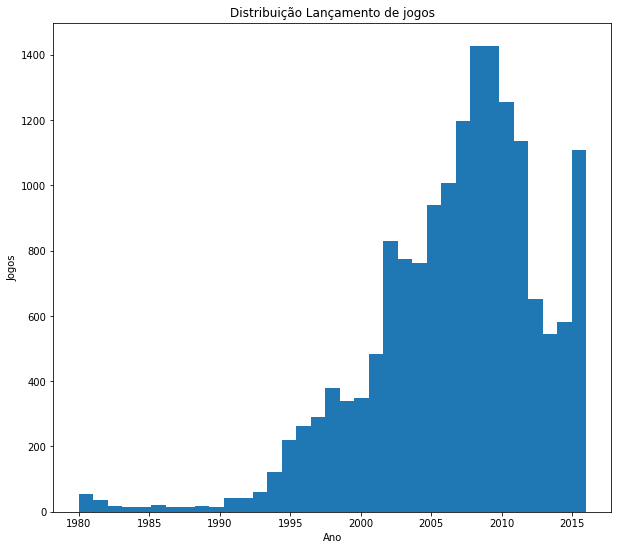

In [55]:
plt.figure(figsize=(10, 9));
plt.hist(years, bins=(35));
plt.title('Distribuição Lançamento de jogos');
plt.xlabel('Ano');
plt.ylabel('Jogos');

Podemos ver um grande crescimento a partir dos anos dos 1994, com a era da tecnologia os consoles foram se popularizando.E o decaimento em 2010 com ascenção do mercado dos mobile.

Como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. 

In [56]:
# Plataformas com as maiores vendas 
df.groupby('platform')['sales'].sum().sort_values(ascending=False).head(2)

platform
PS2     1255.77
X360     971.42
Name: sales, dtype: float64

In [57]:
df_PS2 = df[df['platform']=='PS2']

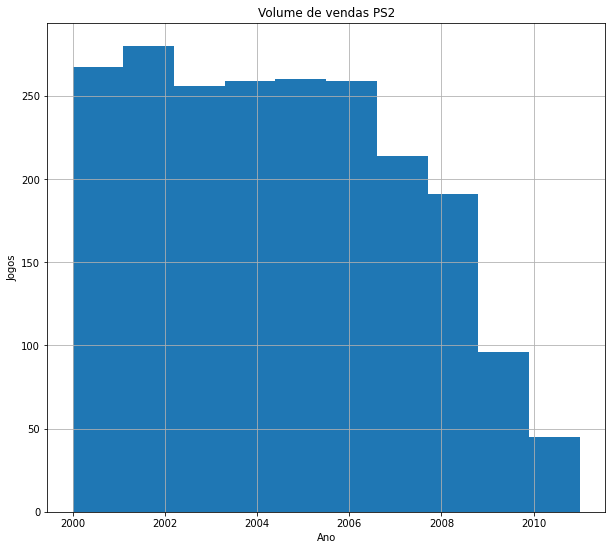

In [58]:
df_PS2.hist('year_of_release',figsize=(10,9));
plt.title('Volume de vendas PS2');
plt.xlabel('Ano');
plt.ylabel('Jogos');

Ao analisarmos, vemos grande volume de vendas a partir do lançamento em 2000 e decaimento em 2007.

In [59]:
df_X360 = df[df['platform']=='X360']

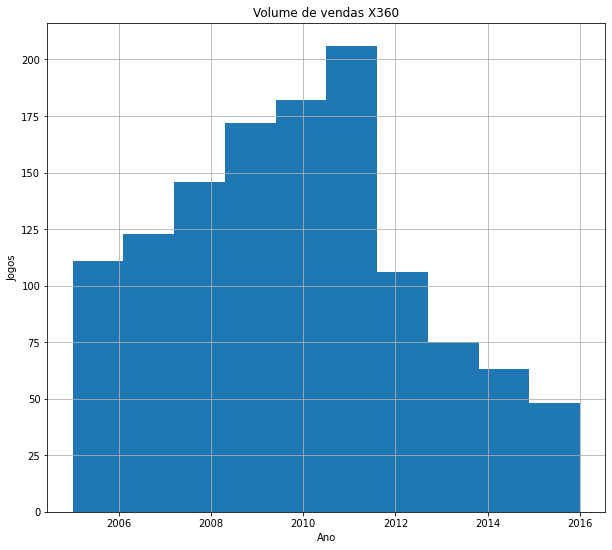

In [60]:
df_X360.hist('year_of_release',figsize=(10,9));
plt.title('Volume de vendas X360');
plt.xlabel('Ano');
plt.ylabel('Jogos');

Ao analisarmos vemos grande volume de vendas a partir do lançamento em 2006 com o pico em 2011 e decaimento em 2012.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! Seus gráficos estão condizentes com suas conclusões, bom uso do groupby para selecionar as plataformas com mais vendas!
</div>

Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [61]:
df_plataform = df.pivot_table(index=['platform','year_of_release'], values='sales', aggfunc='count').reset_index()
df_plataform

,platform,year_of_release,sales
0,2600,1980.0,9
1,2600,1981.0,46
2,2600,1982.0,36
3,2600,1983.0,11
4,2600,1984.0,1
...,...,...,...
233,XB,2008.0,1
234,XOne,2013.0,19
235,XOne,2014.0,61
236,XOne,2015.0,80


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo uso da tabela pivotada, boa!
</div>

In [62]:
df_plataform_count = df_plataform.groupby('platform')['year_of_release'].count()
df_plataform_count

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

In [63]:
df_plataform_count.var()

25.825806451612902

In [64]:
df_plataform_count.std()

5.081909724858648

In [65]:
df_plataform_count.mean()

7.67741935483871

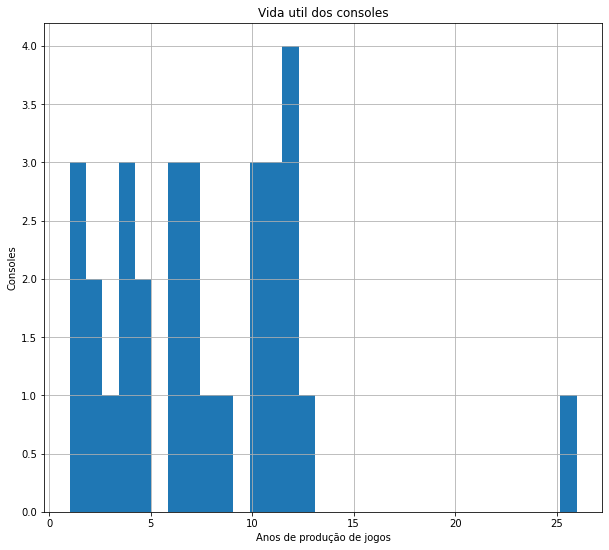

In [66]:
df_plataform_count.hist(bins=31,figsize=(10,9));
plt.title('Vida util dos consoles');
plt.xlabel('Anos de produção de jogos');
plt.ylabel('Consoles');

As plataformas duram aproximadamente em média 7.5 anos.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Média e desvio padrão calculados corretamente, com o histograma também fornecendo boas informações da vida útil
</div>

Abaixo podemos ver a quantidade de vendas de jogos desenvolvidos para as plataformas, começando de 2010 até 2016.

In [67]:
df_seven_years = df[df['year_of_release']==2010]
df_seven_years = df_seven_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_seven_years

platform
X360    170.03
PS3     142.17
Wii     127.95
DS       85.02
PSP      35.04
PC       24.28
PS2       5.64
Name: sales, dtype: float64

In [68]:
df_six_years = df[df['year_of_release']==2011]
df_six_years = df_six_years = df_six_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_six_years

platform
PS3     156.78
X360    143.84
3DS      63.20
Wii      59.65
PC       35.03
DS       26.18
PSP      17.82
PSV       4.63
PS2       0.45
Name: sales, dtype: float64

In [69]:
df_five_years = df[df['year_of_release']==2012]
df_five_years = df_five_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_five_years

platform
PS3     107.36
X360     99.74
3DS      51.36
PC       23.22
Wii      21.71
WiiU     17.56
PSV      16.19
DS       11.01
PSP       7.69
Name: sales, dtype: float64

In [70]:
df_four_years = df[df['year_of_release']==2013]
df_four_years = df_four_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_four_years

platform
PS3     113.25
X360     88.58
3DS      56.57
PS4      25.99
WiiU     21.65
XOne     18.96
PC       12.38
PSV      10.59
Wii       8.59
PSP       3.14
DS        1.54
Name: sales, dtype: float64

In [71]:
df_three_years = df[df['year_of_release']==2014]
df_three_years = df_three_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_three_years

platform
PS4     100.00
XOne     54.07
PS3      47.76
3DS      43.76
X360     34.74
WiiU     22.03
PC       13.28
PSV      11.90
Wii       3.75
PSP       0.24
Name: sales, dtype: float64

In [72]:
df_two_years = df[df['year_of_release']==2015]
df_two_years = df_two_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_two_years

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: sales, dtype: float64

In [73]:
df_one_years = df[df['year_of_release']==2016]
df_one_years = df_one_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
df_one_years

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: sales, dtype: float64

<div class="alert alert-block alert-warning">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Poderia ter colocado num "for" para calcular dos anos de 2010 a 2016
</div>

Estas são as plataformas potencialmente lucrativas: 

PS4/XONE 3 anos de lançamento, PC que há 26 nunca saiu do mercado , ultimo ano do 3DS , WiiU 4 anos de lançamento.

PSV/PS3/X360/Wii são consoles que já estão chegando ao fim.

X360/PS3/ DS/PSP/PS2 eram populares mas agora não têm vendas.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bem analisado e condizente com o apresentado!
</div>

- Vendas globais de todos os jogos, divididos por plataforma.


Abaxo vemos os jogos desde 2010, visando os 7 anos em média de vida de vendas de um console.

In [74]:
df_fil = df.query("platform == 'PS4' or platform == 'XOne'or platform == 'WiiU' or platform == 'PC'")
df_fil = df_fil.query("year_of_release >= 2010")
df_fil

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,97.000000,7.129630,NaN,14.63,regular
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62,regular
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.000000,4.300000,E,8.58,bad
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,84.000000,6.566667,NaN,7.98,bad
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.000000,5.700000,M,7.66,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,72.307692,0.000000,M,0.01,terrible
16678,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,76.583333,6.872727,T,0.01,terrible
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.000000,7.600000,M,0.01,terrible
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.000000,5.800000,T,0.01,terrible


In [75]:
dfplat = df_fil.pivot_table(index=['name','platform'], values='sales', aggfunc='sum').reset_index()
dfplat

,name,platform,sales
0,18 Wheels of Steel: Extreme Trucker 2,PC,0.11
1,4 Play Collection - Dark Mysteries,PC,0.01
2,7 Days to Die,PS4,0.14
3,7 Days to Die,XOne,0.05
4,7 Roses: A Darkness Rises,PC,0.02
...,...,...,...
1260,Zoo Tycoon (2013),XOne,0.36
1261,Zumba Fitness: World Party,XOne,0.24
1262,[Prototype 2],PC,0.11
1263,inFAMOUS: Second Son,PS4,2.79


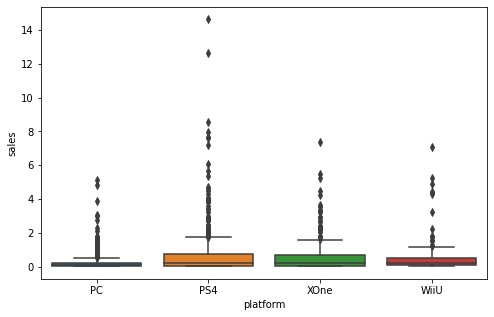

In [76]:
fig, ax = plt.subplots(figsize=(8,5));
sns.boxplot(x='platform', y='sales', data=dfplat);

In [77]:
dfplat_mean = df_fil.pivot_table(index=['platform'], values='sales', aggfunc='mean').sort_values(by='sales',ascending=False)
dfplat_mean

,sales
platform,
PS4,0.801378
XOne,0.645020
WiiU,0.559116
PC,0.254614


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Novamente bom uso da tabela pivotada!
</div>

Com base nas nossas pesquisas, PS4/XOne/WiiU/PC são as melhores plataforma para se desenvolver jogos. As diferenças nas vendas são significativas.


- PS4 - 	0.801378(milhões)
- XOne - 	0.645020(milhões)
- WiiU - 	0.559116(milhões)
- PC -  	0.254614(milhões)

Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

In [78]:
df_PS4 = df[df['platform']=='PS4']
df_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,97.000,7.129630,NaN,14.63,regular
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.000,8.300000,M,12.62,regular
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.000,4.300000,E,8.58,bad
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,84.000,6.566667,NaN,7.98,bad
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.000,5.700000,M,7.66,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.000,7.500000,NaN,0.01,terrible
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,73.275,7.256250,NaN,0.01,terrible
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.000,7.900000,T,0.01,terrible
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.000,5.500000,M,0.01,terrible


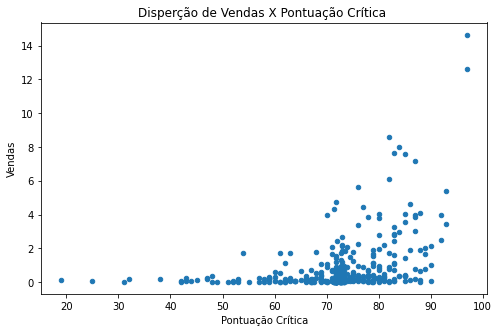

In [79]:
df_PS4.plot(x='critic_score', y='sales', kind='scatter',figsize=(8,5));
plt.title('Disperção de Vendas X Pontuação Crítica ');
plt.xlabel('Pontuação Crítica');
plt.ylabel('Vendas');

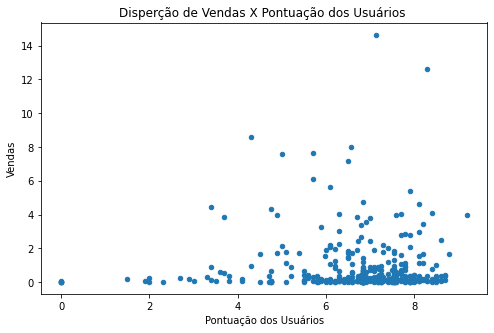

In [80]:
df_PS4.plot(x='user_score', y='sales', kind='scatter',figsize=(8,5));
plt.title('Disperção de Vendas X Pontuação dos Usuários ');
plt.xlabel('Pontuação dos Usuários');
plt.ylabel('Vendas');

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bons plots para analisar o que foi pedido
</div>

In [81]:
df_PS4['sales'].corr(df_PS4['user_score'])

0.0022881116101666947

In [82]:
df_PS4['sales'].corr(df_PS4['critic_score'])

0.3936750556021805

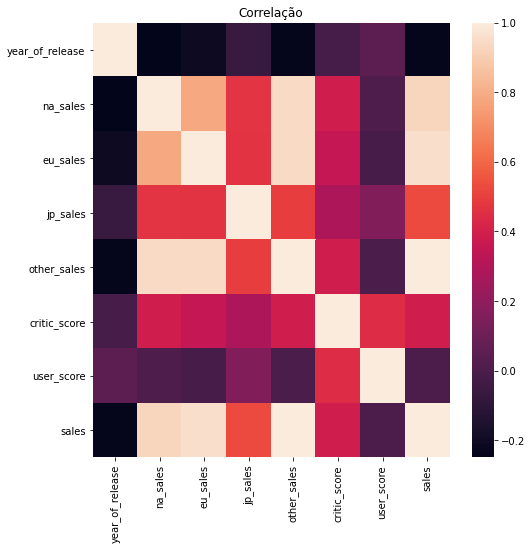

In [83]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(df_PS4.corr());
plt.title('Correlação');

Podemos analizar que a Pontuação crítica influencia nas vendas dos jogos, já a pontuação do usuário bem pouco, pois é questão de preferência.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok!
</div>

- compare as vendas dos mesmos jogos em outras plataformas.

In [84]:
games_plat = df_fil.pivot_table(index=['name'], values='platform', aggfunc='count').reset_index().sort_values(by='platform',ascending=False)

In [85]:
games_plat_dif = games_plat[games_plat['platform']>3] 

In [86]:
name = games_plat_dif['name'].unique()

In [87]:
name

array(["Assassin's Creed IV: Black Flag", 'LEGO Jurassic World',
       'LEGO The Hobbit', 'The Amazing Spider-Man 2 (2014)',
       'Lego Batman 3: Beyond Gotham', 'Terraria', 'Darksiders II',
       'LEGO Marvel Super Heroes', 'The LEGO Movie Videogame',
       'Watch Dogs', 'Call of Duty: Ghosts'], dtype=object)

In [88]:
def listaFiltro(dataframe, valores):
    return dataframe.loc[dataframe['name'].isin(valores)]




<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Gostei da definição desta função!
</div>

In [89]:
df_games = listaFiltro(df_fil, name)
df_games = df_games.sort_values(by='name')

In [90]:
df_games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
509,Assassin's Creed IV: Black Flag,PS4,2013.0,Action,1.07,1.31,0.06,0.42,83.000000,7.8,M,2.86,terrible
721,Assassin's Creed IV: Black Flag,XOne,2013.0,Action,1.48,0.55,0.00,0.21,72.307692,7.4,M,2.24,terrible
3130,Assassin's Creed IV: Black Flag,PC,2013.0,Action,0.22,0.38,0.00,0.05,84.000000,7.7,M,0.65,terrible
6081,Assassin's Creed IV: Black Flag,WiiU,2013.0,Action,0.17,0.09,0.00,0.03,86.000000,7.7,M,0.29,terrible
5348,Call of Duty: Ghosts,WiiU,2013.0,Shooter,0.22,0.09,0.01,0.03,69.000000,3.4,M,0.35,terrible


In [91]:
df_games_equal = df_games[['name','platform','sales']]

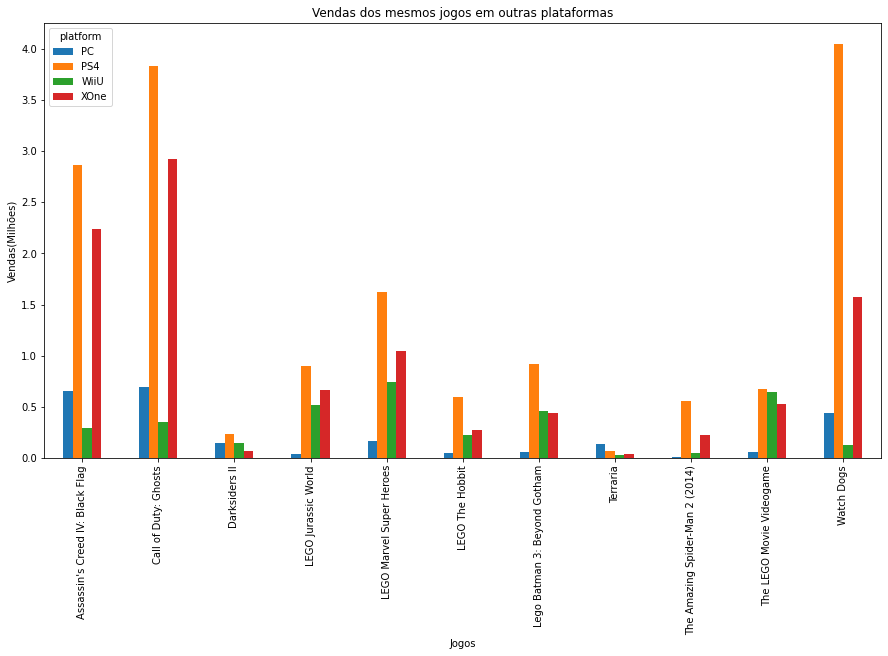

In [92]:

df_games_equal.pivot_table(index='name',columns='platform', values='sales', aggfunc='sum').plot(kind='bar',figsize=(15,8));
plt.title('Vendas dos mesmos jogos em outras plataformas');
plt.xlabel('Jogos');
plt.ylabel('Vendas(Milhões)');


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo gráfico a partir da tabela pivotada, muito bom!
</div>

Transformamos em array os jogos e comparamos as vendas dos mesmos jogos em outras plataformas

 O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

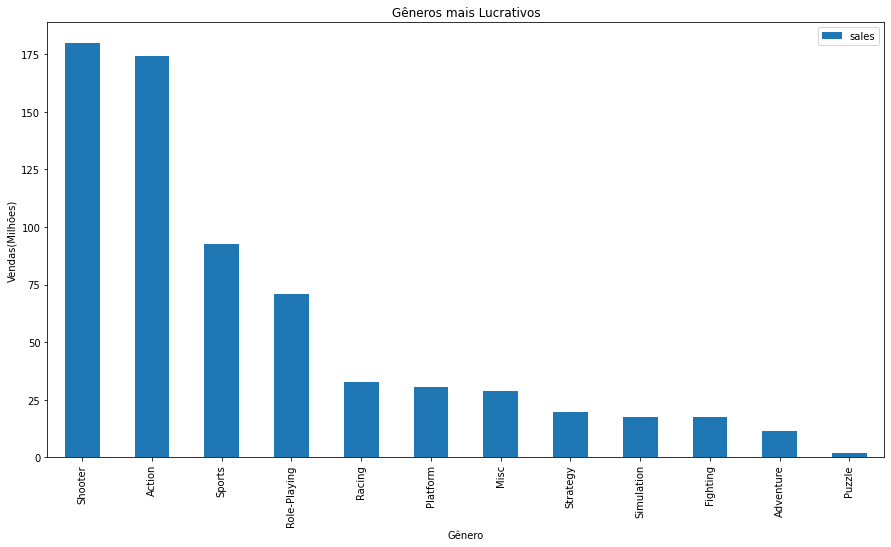

In [93]:
df_gen  = df_fil.pivot_table(index=['genre'], values='sales', aggfunc='sum').reset_index().sort_values(by='sales',ascending=False)
df_gen.plot(kind='bar',x='genre',y='sales',figsize=(15,8))
plt.title('Gêneros mais Lucrativos');
plt.xlabel('Gênero');
plt.ylabel('Vendas(Milhões)');
plt.show()

O Gênero de jogos de tiro é o mais famoso, seguido de jogos Ação e Esportes.

Já os jogos de luta, aventura e quebra-cabeça estão entre os menos atrativos.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Novamente, bom uso da tabela pivotada para checar as relações entre vendas e gênero do jogo
</div>

- Criar um perfil de usuário para cada região

As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

In [94]:
df_na  = df_fil.pivot_table(index=['genre'], values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False).head(5)
df_na

,genre,na_sales
8,Shooter,80.19
0,Action,70.82
10,Sports,37.23
7,Role-Playing,29.47
3,Misc,13.90


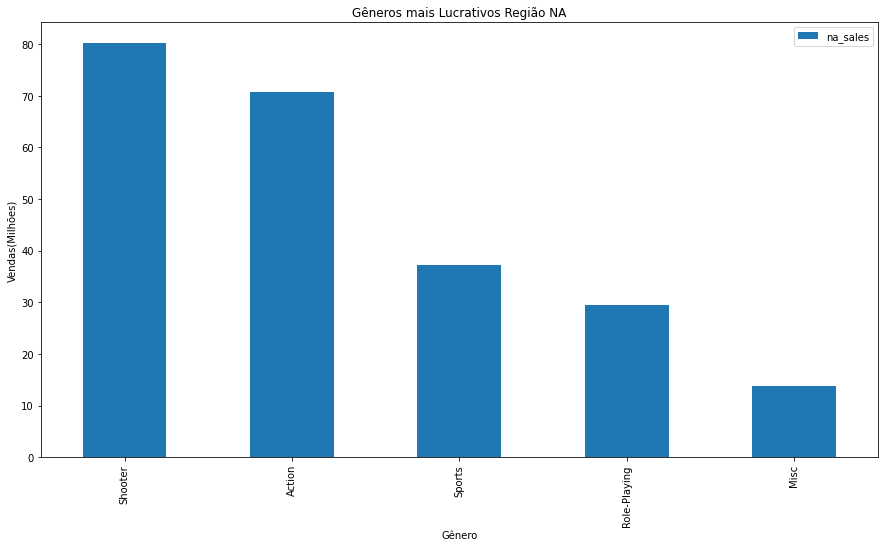

In [95]:
df_na.plot(kind='bar',x='genre',y='na_sales',figsize=(15,8))
plt.title('Gêneros mais Lucrativos Região NA');
plt.xlabel('Gênero');
plt.ylabel('Vendas(Milhões)');
plt.show()

In [96]:
df_eu  = df_fil.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending=False).head(5)
df_eu 

,genre,eu_sales
0,Action,74.27
8,Shooter,72.49
10,Sports,41.30
7,Role-Playing,28.72
6,Racing,16.57


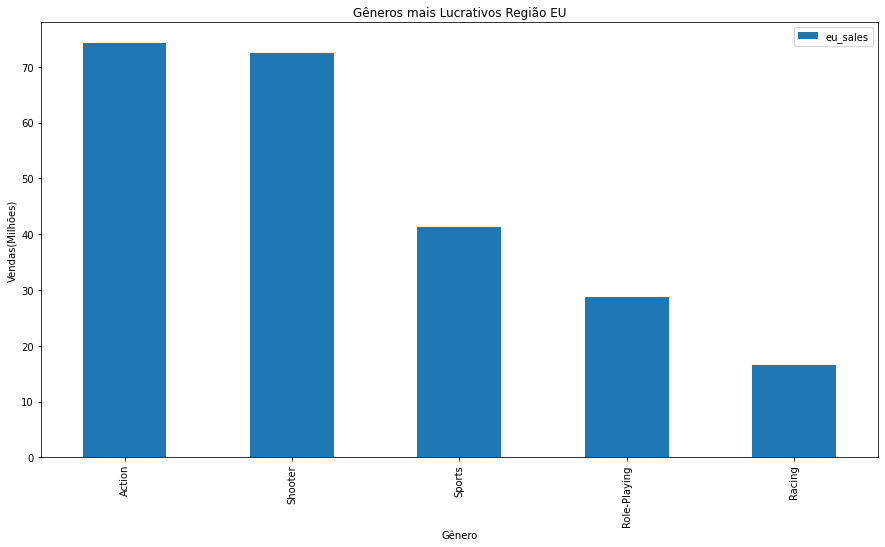

In [97]:
df_eu.plot(kind='bar',x='genre',y='eu_sales',figsize=(15,8))
plt.title('Gêneros mais Lucrativos Região EU');
plt.xlabel('Gênero');
plt.ylabel('Vendas(Milhões)');
plt.show()

In [98]:
df_jp  = df_fil.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False).head(5)
df_jp

,genre,jp_sales
0,Action,7.04
8,Shooter,4.51
7,Role-Playing,4.45
4,Platform,4.17
3,Misc,2.88


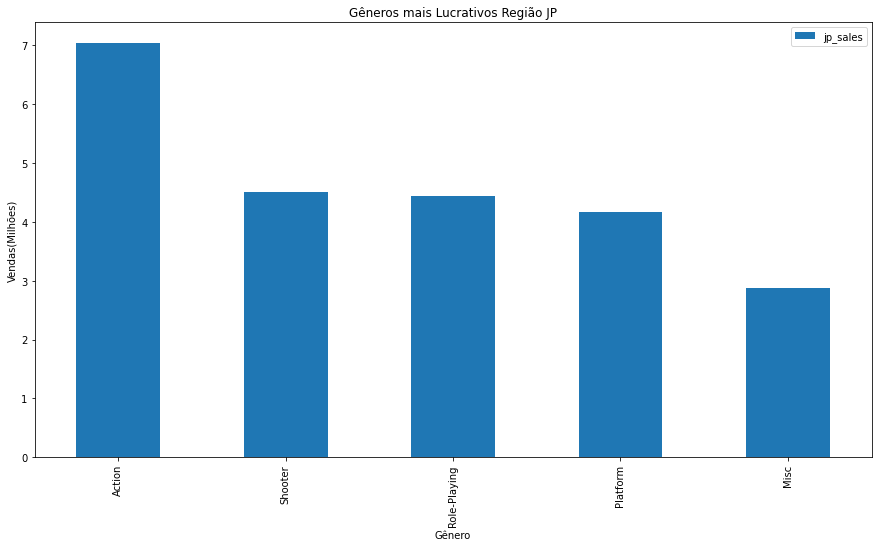

In [99]:
df_jp.plot(kind='bar',x='genre',y='jp_sales',figsize=(15,8))
plt.title('Gêneros mais Lucrativos Região JP');
plt.xlabel('Gênero');
plt.ylabel('Vendas(Milhões)');
plt.show()

Os cinco principais gêneros. Explique a diferença.

Não há tanta diferença nas 3 regiões quanto ao top 5 de cada região, são bem parecidos. Na região JP, jogos sobre esportes não são famosos. 

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! Ótimos gráficos para cada região
</div>

 - As classificações do ESRB afetam as vendas em regiões individuais

In [100]:
df_na_rating  = df_fil.pivot_table(index=['rating'], values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False).head(5)
df_na_rating

,rating,na_sales
3,M,108.13
0,E,47.36
5,T,43.29
1,E10+,32.40
2,EC,0.09


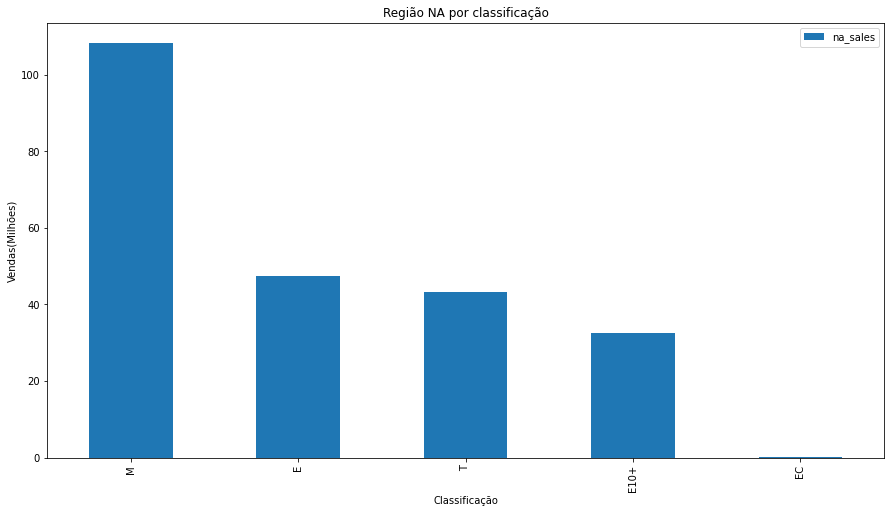

In [101]:
df_na_rating.plot(kind='bar',x='rating',y='na_sales',figsize=(15,8))
plt.title('Região NA por classificação');
plt.xlabel('Classificação');
plt.ylabel('Vendas(Milhões)');
plt.show()

In [102]:
df_eu_rating  = df_fil.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending=False).head(5)
df_eu_rating

,rating,eu_sales
3,M,112.94
0,E,56.22
5,T,43.45
1,E10+,24.95
4,RP,0.03


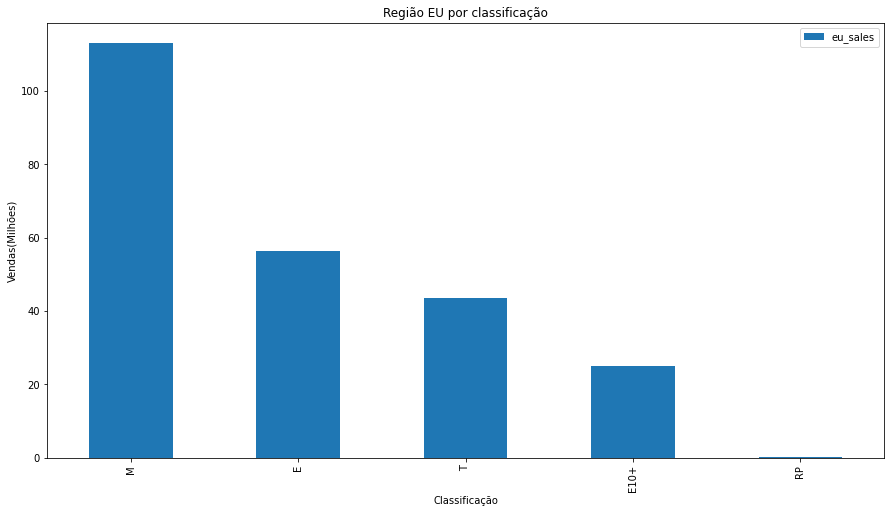

In [103]:
df_eu_rating.plot(kind='bar',x='rating',y='eu_sales',figsize=(15,8))
plt.title('Região EU por classificação');
plt.xlabel('Classificação');
plt.ylabel('Vendas(Milhões)');
plt.show()

In [104]:
df_jp_rating  = df_fil.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False).head(5)
df_jp_rating 

,rating,jp_sales
0,E,7.54
3,M,5.71
5,T,3.47
1,E10+,3.45
2,EC,0.00


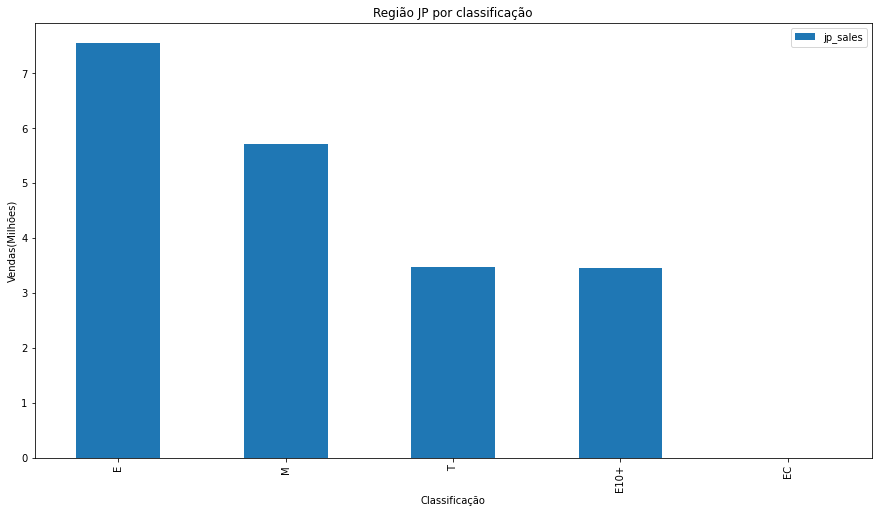

In [105]:
df_jp_rating.plot(kind='bar',x='rating',y='jp_sales',figsize=(15,8))
plt.title('Região JP por classificação');
plt.xlabel('Classificação');
plt.ylabel('Vendas(Milhões)');
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

No caso destes plots você deve visualizar no eixo x o "rating" dos jogos, e não "genre"
</div>

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Bem corrigido!
</div>

Notoriamente as classificaçõs impactam nas vendas sendo M(Maiores de 17 anos) em destaque nas regiões de NA e EU. E para região JP, a mais popular é E(Maiores de 6 anos ou livre).

Pelas analises feitas podemos concluir que as classificações do ESRB afetam as vendas em regiões individuais.

## Testando hipóteses

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas?

In [106]:
alpha = 0.05

In [107]:
df_xone = df_fil.query("platform == 'XOne'")

In [108]:
df_pc = df_fil.query("platform == 'PC'")

In [109]:
results_plat = st.ttest_ind(df_xone['user_score'], df_pc['user_score'],equal_var = False)

In [110]:
print('p-value:', results_plat.pvalue)

p-value: 0.6602470416870396


In [111]:
if results_plat.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Nós não podemos rejeitar a hipótese nula


O valor-p nos diz que, embora as classificações médias dos usuários das plataformas Xbox One e PC sejam diferentes, há uma probabilidade de 60% de obter aleatoriamente uma diferença desse tamanho ou maior. Esta probabilidade é suficiente para concluir que há uma diferença significativa entre os valores médios de classificação.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ok! Código condizente com a conclusão e bem diagramado!
</div>

### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes?

In [112]:
df_action = df_fil.query("genre == 'Action'")

In [113]:
df_sports = df_fil.query("genre == 'Sports'")

In [114]:
results_gen = st.ttest_ind(df_action['user_score'], df_sports['user_score'],equal_var = False)

In [115]:
print('p-value:', results_gen.pvalue)

p-value: 3.616543702770749e-09


In [116]:
if results_gen.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Nós rejeitamos a hipótese nula


O valor-p nos diz que os valores As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>

Ótimo!
</div>

## Conclusão geral

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos, e "matplotlib" e "seaborn" para a construção de graficos para melhor visualização e entendimento do problema.

Com base nos estudos realizamos o pré-processamento de dados,em cada coluna realizamos a padronização de estilos, modificamos valores incongruentes, substituimos valores ausentes com base em estudos sobre outras colunas com valores devidamente preenchidos, verificamos as duplicatas de valores existente na base de dados,e realizamos o estudo os dados coletados para determinar Quais padrões que determinam se um jogo tem sucesso.

Com base na Análise exploratória de dados,concluimos que as Plataformas tem vida util em média de 7 anos, sendo as mais promissoras: PS4/XOne/WiiU/PC,podemos analizar que a Pontuação crítica influencia nas vendas dos jogos, porém a avaliação não inpacta tanto, dependendo da plataforma o mesmo jogo em varias delas, o que mais lucrativo é o PS4, por ser mais popular e o PC pela durabilidade.Notoriamente as classificaçõs impactam nas vendas sendo M(Maiores de 17 anos) em destaque nas regiões de NA e EU. E para região JP, a mais popular é E(Maiores de 6 anos ou livre).

Sobre as hipoteses levantadas não podemos afirmar que médias dos usuários das plataformas Xbox One e PC são iguais, porém sobre os valores As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.